In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

错误: 找不到文件 Gloc/results/GLoc_Final_Zoulang.csv
请检查 'results' 目录下是否有该文件。
📄 文件名: GLoc_Final_Zoulang.csv
------------------------------------------------------------
✅ 最终评估指标:
   RMSE (均方根误差):  0.6657 m
   P75  (75%误差线):   0.6486 m
   P95  (95%误差线):   1.3307 m
   Mean Jerk (平滑度): 0.3144 m/s^3
图片已保存至: Picture/GLoc_Final_Zoulang_Eval_Plot.png


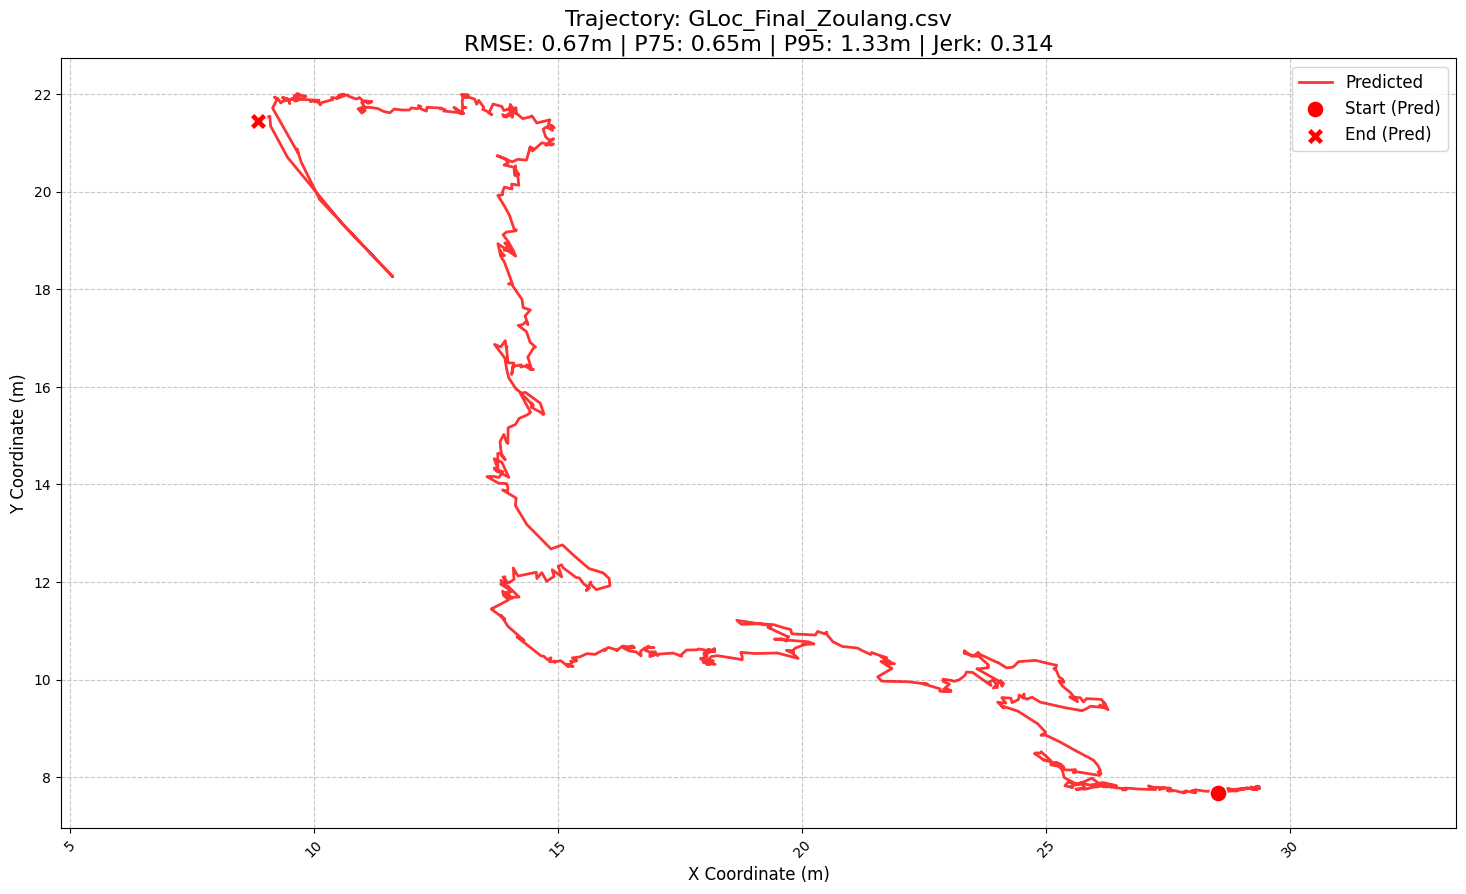

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------------------------------------------------------------
# 配置部分
# ------------------------------------------------------------------------------
# direct = "GATE/results/"
# direct = "Gloc/results/"
# direct = "将KAN换位MLP/results/"
# direct = "GNN(只连当前时间)+MLP/results/"
# direct = "Zigbee/results/"
direct = "Gloc/results/"
# direct = "tkan/results/"
# 请确保这里的文件名正确
# filename = "GATE_zoulang.csv" 
# filename = "GLoc_Final_Gloc_Zoulang.csv" 
# filename = "Zigbee_zoulang.csv"
# filename = "GMLP_full_graph_MLP_FULL_Graph_Cheku.csv"
filename = "GLoc_Final_Zoulang.csv"
# filename = "tkan_zoulang.csv"
csv_path = os.path.join(direct, filename)

# 读取数据
try:
    df = pd.read_csv(csv_path)
    print(f"成功读取文件: {csv_path}")
except FileNotFoundError:
    print(f"错误: 找不到文件 {csv_path}")
    print("请检查 'results' 目录下是否有该文件。")
    exit()

# ------------------------------------------------------------------------------
# 1. 计算评估指标 (RMSE, Jerk, P75, P95)
# ------------------------------------------------------------------------------
true_coords = df[['True_X', 'True_Y']].values
pred_coords = df[['Pred_X', 'Pred_Y']].values

# --- 1.1 计算所有点的欧氏距离误差 (Positioning Error) ---
# errors shape: (N,)
diff = true_coords - pred_coords
squared_diff = diff ** 2
# 每个点的定位误差 = sqrt(dx^2 + dy^2)
errors_all = np.sqrt(np.sum(squared_diff, axis=1))

# --- 1.2 计算 RMSE ---
# RMSE = sqrt(mean(error^2))
rmse = np.sqrt(np.mean(errors_all ** 2))

# --- 1.3 计算 P75 和 P95 ---
p75 = np.percentile(errors_all, 75)
p95 = np.percentile(errors_all, 95)

# --- 1.4 计算 Mean Jerk (m/s^3) ---
dt = 1  # 假设采样间隔为 1秒
velocity = np.diff(pred_coords, axis=0) / dt
acceleration = np.diff(velocity, axis=0) / dt
jerk = np.diff(acceleration, axis=0) / dt
jerk_magnitude = np.linalg.norm(jerk, axis=1)
mean_jerk = np.mean(jerk_magnitude)

# --- 打印结果 ---
print("="*60)
print(f"📄 文件名: {filename}")
print("-" * 60)
print("✅ 最终评估指标:")
print(f"   RMSE (均方根误差):  {rmse:.4f} m")
print(f"   P75  (75%误差线):   {p75:.4f} m")
print(f"   P95  (95%误差线):   {p95:.4f} m")
print(f"   Mean Jerk (平滑度): {mean_jerk:.4f} m/s^3")
print("="*60)

# ------------------------------------------------------------------------------
# 2. 绘图
# ------------------------------------------------------------------------------

# 为了绘图清晰，每隔 10 个点采样一次（根据数据量调整）
step = 1
selected_true_X = df['True_X'][::step]
selected_true_Y = df['True_Y'][::step]
selected_pred_X = df['Pred_X'][::step]
selected_pred_Y = df['Pred_Y'][::step]

plt.figure(figsize=(18, 10))

# 绘制真实路径
# plt.plot(selected_true_X, selected_true_Y, label='Ground Truth', color='blue', linewidth=2, alpha=0.6)
# 起点终点
# plt.scatter(selected_true_X.iloc[0], selected_true_Y.iloc[0], color='blue', marker='o', s=150, label='Start (True)', edgecolors='white', zorder=5)
# plt.scatter(selected_true_X.iloc[-1], selected_true_Y.iloc[-1], color='blue', marker='X', s=150, label='End (True)', edgecolors='white', zorder=5)

# 绘制预测路径
plt.plot(selected_pred_X, selected_pred_Y, label='Predicted', color='red', linewidth=2, alpha=0.8)
# 起点终点
plt.scatter(selected_pred_X.iloc[0], selected_pred_Y.iloc[0], color='red', marker='o', s=150, label='Start (Pred)', edgecolors='white', zorder=5)
plt.scatter(selected_pred_X.iloc[-1], selected_pred_Y.iloc[-1], color='red', marker='X', s=150, label='End (Pred)', edgecolors='white', zorder=5)

plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Y Coordinate (m)', fontsize=12)
plt.xticks(rotation=45)

# [修改] 标题包含 RMSE, P75, P95, Mean Jerk
title_str = (f"Trajectory: {filename}\n"
             f"RMSE: {rmse:.2f}m | P75: {p75:.2f}m | P95: {p95:.2f}m | Jerk: {mean_jerk:.3f}")
plt.title(title_str, fontsize=16)

plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal') # 保持比例

# 保存图片
di = "Picture/"
os.makedirs(di, exist_ok=True)
save_name = filename.replace('.csv', '_Eval_Plot.png')
plt.savefig(os.path.join(di, save_name), dpi=300, bbox_inches='tight')
print(f"图片已保存至: {os.path.join(di, save_name)}")

plt.show()

成功读取文件: results/KF_Cheku
📄 文件名: KF_Cheku
------------------------------------------------------------
✅ 最终评估指标:
   ATE  (绝对轨迹误差/RMSE): 5.1266 m
   RPE  (相对轨迹误差):      0.7735 m/step
   P75  (75%误差线):         5.4645 m
   P95  (95%误差线):         9.5983 m
   Jerk (平滑度):            0.3345 m/s^3
图片已保存至: Picture/KF_Cheku


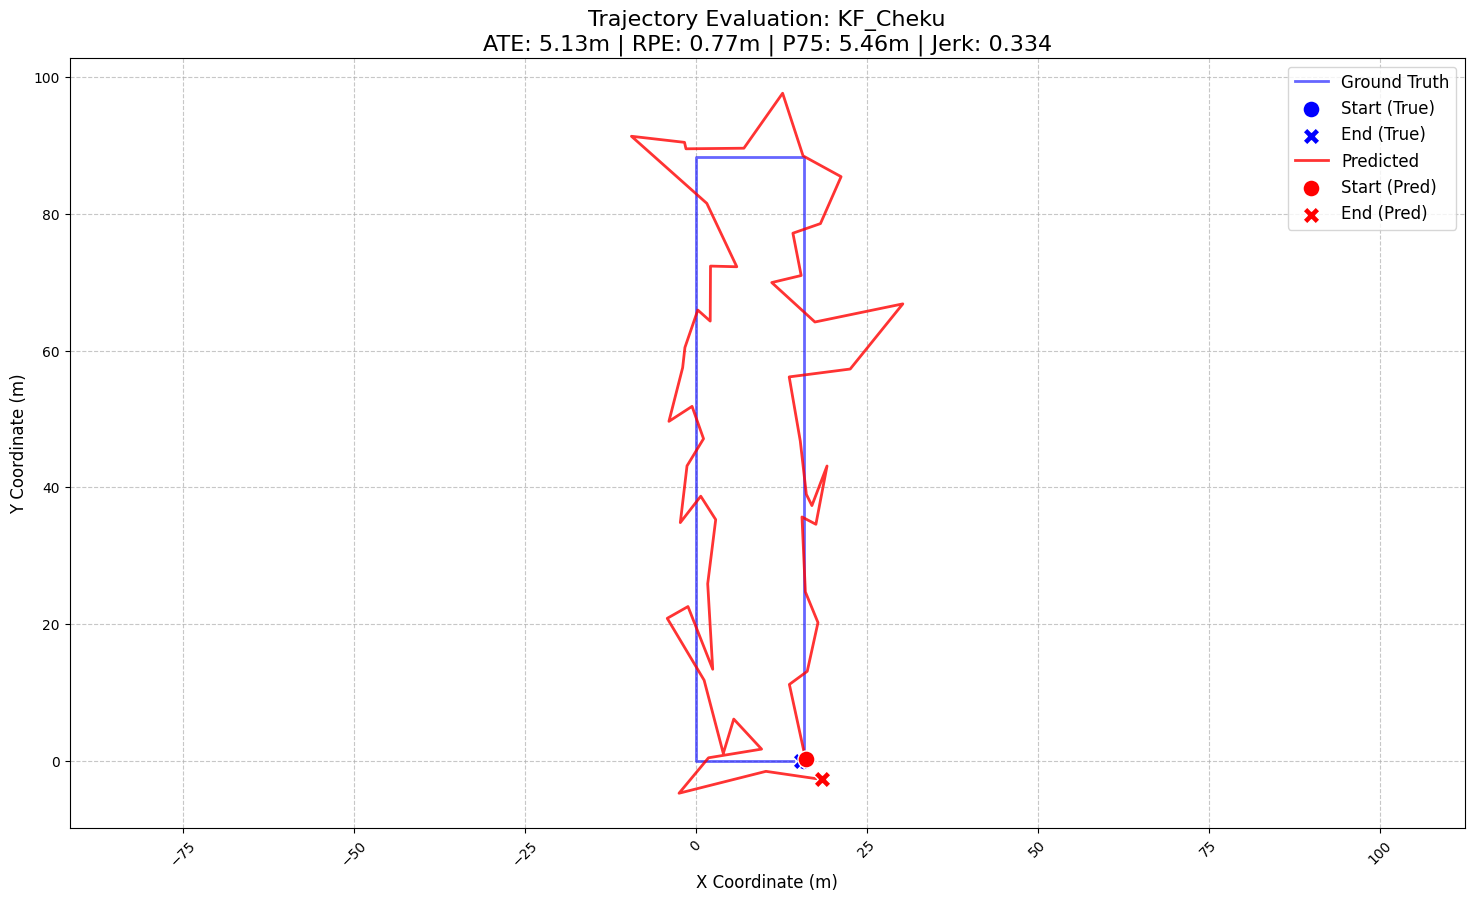

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------------------------------------------------------------
# 配置部分
# ------------------------------------------------------------------------------
direct = "results/"
# direct = "Gloc/results/"

# 请确保这里的文件名正确
# filename = "Transformer_Cheku.csv"
filename = "KF_Cheku"

csv_path = os.path.join(direct, filename)

# 读取数据
try:
    df = pd.read_csv(csv_path)
    print(f"成功读取文件: {csv_path}")
except FileNotFoundError:
    print(f"错误: 找不到文件 {csv_path}")
    print("请检查 'results' 目录下是否有该文件。")
    exit()

# ------------------------------------------------------------------------------
# 1. 计算评估指标
#    包含: RMSE, ATE, RPE, Jerk, P75, P95
# ------------------------------------------------------------------------------
true_coords = df[['True_X', 'True_Y']].values
pred_coords = df[['Pred_X', 'Pred_Y']].values

# --- 1.1 计算所有点的欧氏距离误差 (Positioning Error) ---
# errors shape: (N,)
diff = true_coords - pred_coords
squared_diff = diff ** 2
# 每个点的定位误差 = sqrt(dx^2 + dy^2)
errors_all = np.sqrt(np.sum(squared_diff, axis=1))

# --- 1.2 计算 RMSE & ATE ---
# ATE (Absolute Trajectory Error) 通常定义为位置误差的 RMSE
# 公式: sqrt(mean(error^2))
ate = np.sqrt(np.mean(errors_all ** 2))
rmse = ate # 保持兼容，RMSE 和 ATE 在此处数学定义一致

# --- 1.3 计算 RPE (Relative Pose Error / 相对误差) ---
# RPE 衡量的是“这一步走的对不对”，即位移向量的误差，而不是绝对位置的误差
# 它可以反映系统的漂移 (Drift) 情况
delta_true = np.diff(true_coords, axis=0) # 真实位移向量 (dx, dy)
delta_pred = np.diff(pred_coords, axis=0) # 预测位移向量 (dx, dy)

# 计算每一步位移向量的差值
delta_diff = delta_true - delta_pred
# 计算每一步差值的欧氏距离 (模长)
rpe_all = np.sqrt(np.sum(delta_diff ** 2, axis=1))
# RPE 结果通常取 RMSE
rpe = np.sqrt(np.mean(rpe_all ** 2))

# --- 1.4 计算 P75 和 P95 ---
p75 = np.percentile(errors_all, 75)
p95 = np.percentile(errors_all, 95)

# --- 1.5 计算 Mean Jerk (平滑度) ---
dt = 1  # 假设采样间隔为 1秒
velocity = np.diff(pred_coords, axis=0) / dt
acceleration = np.diff(velocity, axis=0) / dt
jerk = np.diff(acceleration, axis=0) / dt
jerk_magnitude = np.linalg.norm(jerk, axis=1)
mean_jerk = np.mean(jerk_magnitude)

# --- 打印结果 ---
print("="*60)
print(f"📄 文件名: {filename}")
print("-" * 60)
print("✅ 最终评估指标:")
print(f"   ATE  (绝对轨迹误差/RMSE): {ate:.4f} m")
print(f"   RPE  (相对轨迹误差):      {rpe:.4f} m/step")
print(f"   P75  (75%误差线):         {p75:.4f} m")
print(f"   P95  (95%误差线):         {p95:.4f} m")
print(f"   Jerk (平滑度):            {mean_jerk:.4f} m/s^3")
print("="*60)

# ------------------------------------------------------------------------------
# 2. 绘图
# ------------------------------------------------------------------------------

# 为了绘图清晰，每隔 step 个点采样一次（根据数据量调整）
step = 10
selected_true_X = df['True_X'][::step]
selected_true_Y = df['True_Y'][::step]
selected_pred_X = df['Pred_X'][::step]
selected_pred_Y = df['Pred_Y'][::step]

plt.figure(figsize=(18, 10))

# 绘制真实路径
plt.plot(selected_true_X, selected_true_Y, label='Ground Truth', color='blue', linewidth=2, alpha=0.6)
# 起点终点
plt.scatter(selected_true_X.iloc[0], selected_true_Y.iloc[0], color='blue', marker='o', s=150, label='Start (True)', edgecolors='white', zorder=5)
plt.scatter(selected_true_X.iloc[-1], selected_true_Y.iloc[-1], color='blue', marker='X', s=150, label='End (True)', edgecolors='white', zorder=5)

# 绘制预测路径
plt.plot(selected_pred_X, selected_pred_Y, label='Predicted', color='red', linewidth=2, alpha=0.8)
# 起点终点
plt.scatter(selected_pred_X.iloc[0], selected_pred_Y.iloc[0], color='red', marker='o', s=150, label='Start (Pred)', edgecolors='white', zorder=5)
plt.scatter(selected_pred_X.iloc[-1], selected_pred_Y.iloc[-1], color='red', marker='X', s=150, label='End (Pred)', edgecolors='white', zorder=5)

plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Y Coordinate (m)', fontsize=12)
plt.xticks(rotation=45)

# [修改] 标题包含 ATE, RPE, P75, P95, Mean Jerk
# 注意：ATE 即 RMSE
title_str = (f"Trajectory Evaluation: {filename}\n"
             f"ATE: {ate:.2f}m | RPE: {rpe:.2f}m | P75: {p75:.2f}m | Jerk: {mean_jerk:.3f}")
plt.title(title_str, fontsize=16)

plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal') # 保持比例

# 保存图片
di = "Picture/"
os.makedirs(di, exist_ok=True)
save_name = filename.replace('.csv', '_Eval_Plot.png')
plt.savefig(os.path.join(di, save_name), dpi=300, bbox_inches='tight')
print(f"图片已保存至: {os.path.join(di, save_name)}")

plt.show()